# Team Members
- Omer Elghareeb
- Sherif Samy
- Hadeer Ismail
- Shereen
- Noor Samy
- Aya Elsawy

In [1]:
from google.colab import drive
dataset_file = '/content/drive/MyDrive/Colab Notebooks/Cellula-ML-Projects/Datasets/Taxi-Fare-Amounts.csv'
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings

# Filter out all warnings
warnings.filterwarnings("ignore")

## Data Understanding

## Objective

The aim of this dataset called New York taxi fare based on the airports mentioned in the data dataset is to provide a comprehensive collection of data on taxi rides within New York City. This dataset is valuable for analyzing and understanding various factors influencing taxi fare amounts, enabling researchers and analysts to develop models that accurately predict fare costs based on relevant input features.



## Data Explaining

The dataset contains several columns with information about taxi service.The detailed data is given below:

* <code>'User ID'</code>: A unique identifier for each user.
* <code>'User Name'</code>: The name of the user.
* <code>'Driver Name'</code>: The name of the taxi driver.
* <code>'Car Condition'</code>: The condition of the taxi car.
* <code>'Weather'</code>: Information about the weather conditions during the trip.
* <code>'Traffic Condition'</code>: Information about the traffic conditions during the trip.
* <code>'key'</code>: A unique identifier for each trip.
* <code>'fare_amount'</code>: The fare amount charged for the trip.
* <code>'pickup_datetime'</code>: The date and time when the trip started.
* <code>'pickup_longitude'</code>: The longitude coordinate of the pickup location.
* <code>'pickup_latitude'</code>: The latitude coordinate of the pickup location.
* <code>'dropoff_longitude'</code>: The longitude coordinate of the dropoff location.
* <code>'dropoff_latitude'</code>: The latitude coordinate of the dropoff location.
* <code>'passenger_count'</code>: The number of passengers in the taxi.
* <code>'hour'</code>: The hour of the day when the trip started.
* <code>'day'</code>: The day of the month when the trip started.
* <code>'month'</code>: The month when the trip started.
* <code>'weekday'</code>: The day of the week when the trip started.
* <code>'year'</code>: The year when the trip started.
* <code>'jfk_dist'</code>: The distance from the pickup location to John F. Kennedy International Airport.
* <code>'ewr_dist'</code>: The distance from the pickup location to Newark Liberty International Airport.
* <code>'lga_dist'</code>: The distance from the pickup location to LaGuardia Airport.
* <code>'sol_dist'</code>: The distance from the pickup location to Statue of Liberty.
* <code>'nyc_dist'</code>: The distance from the pickup location to the center of New York City.
* <code>'distance'</code>: The total distance of the trip.
* <code>'bearing'</code>: The direction of travel from the pickup point to the dropoff point.

for more information about bearing and distance in this notebook, you can go to https://www.movable-type.co.uk/scripts/latlong.html


In [3]:
df=pd.read_csv(dataset_file)
df.head()

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,...,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,...,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   User ID            500000 non-null  object 
 1   User Name          500000 non-null  object 
 2   Driver Name        500000 non-null  object 
 3   Car Condition      500000 non-null  object 
 4   Weather            500000 non-null  object 
 5   Traffic Condition  500000 non-null  object 
 6   key                500000 non-null  object 
 7   fare_amount        500000 non-null  float64
 8   pickup_datetime    500000 non-null  object 
 9   pickup_longitude   500000 non-null  float64
 10  pickup_latitude    500000 non-null  float64
 11  dropoff_longitude  499995 non-null  float64
 12  dropoff_latitude   499995 non-null  float64
 13  passenger_count    500000 non-null  int64  
 14  hour               500000 non-null  int64  
 15  day                500000 non-null  int64  
 16  mo

***Check the dubclicates***


In [ ]:
df.duplicated().sum()

0

***Missing Values***

In [ ]:
df.isnull().sum()

User ID              0
User Name            0
Driver Name          0
Car Condition        0
Weather              0
Traffic Condition    0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    5
dropoff_latitude     5
passenger_count      0
hour                 0
day                  0
month                0
weekday              0
year                 0
jfk_dist             5
ewr_dist             5
lga_dist             5
sol_dist             5
nyc_dist             5
distance             5
bearing              5
dtype: int64

***Select the Object & primitive Dtypes***

In [ ]:
object_cols=df.select_dtypes(include=['object']).columns.to_list()
Primative_cols=df.select_dtypes(include=['int64','float64']).columns.to_list()
print(len(object_cols),len(Primative_cols))


8 18


In [ ]:
object_cols

['User ID',
 'User Name',
 'Driver Name',
 'Car Condition',
 'Weather',
 'Traffic Condition',
 'key',
 'pickup_datetime']

***Plot some features to check its distibution***

caltegorical_features=['Car Condition','Traffic Condition','Weather']
fig, ax = plt.subplots(2,2,figsize=(8,5))

for i, col in enumerate(caltegorical_features):
    sns.boxplot(x=col, data=df, ax=ax.flatten()[i])
    ax.flatten()[i].set_title(f'{col.upper()}', fontsize=8)
    ax.flatten()[i].set_xlabel(col, fontsize=8)
    ax.flatten()[i].set_ylabel('Frequency', fontsize=8)
    ax.flatten()[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

***Fare_amount distribution & totaldistance***

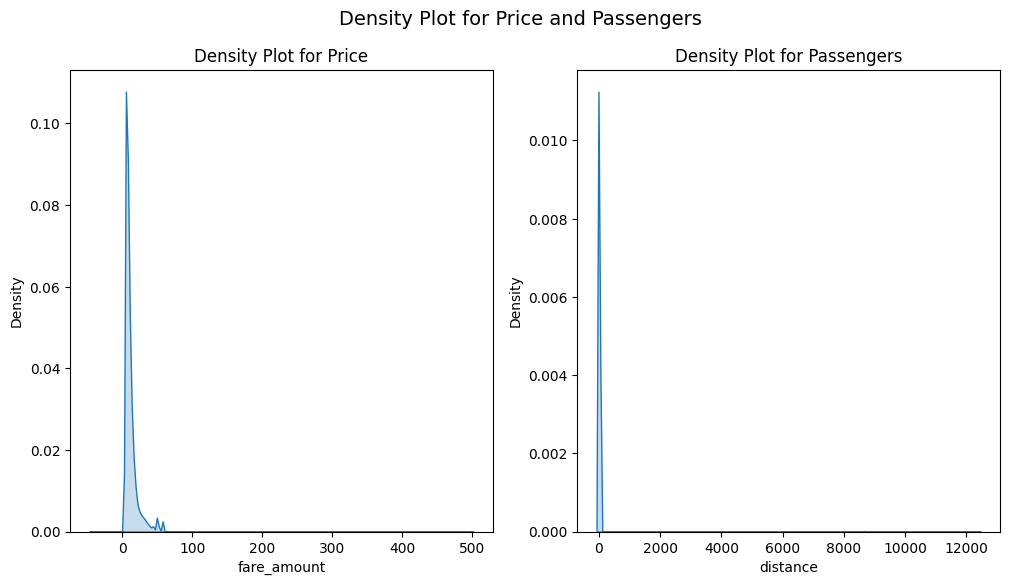

In [ ]:
# Create a figure dimensions
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Density Plot for 'average price'
sns.kdeplot(data=df['fare_amount'], ax=axes[0], fill=True)
axes[0].set_title('Density Plot for Price')
# Density Plot for 'lead time'
sns.kdeplot(data=df['distance'], ax=axes[1], fill=True)
axes[1].set_title('Density Plot for Passengers')
# Subplots Title
plt.suptitle('Density Plot for Price and Passengers', fontsize=14)
plt.show()

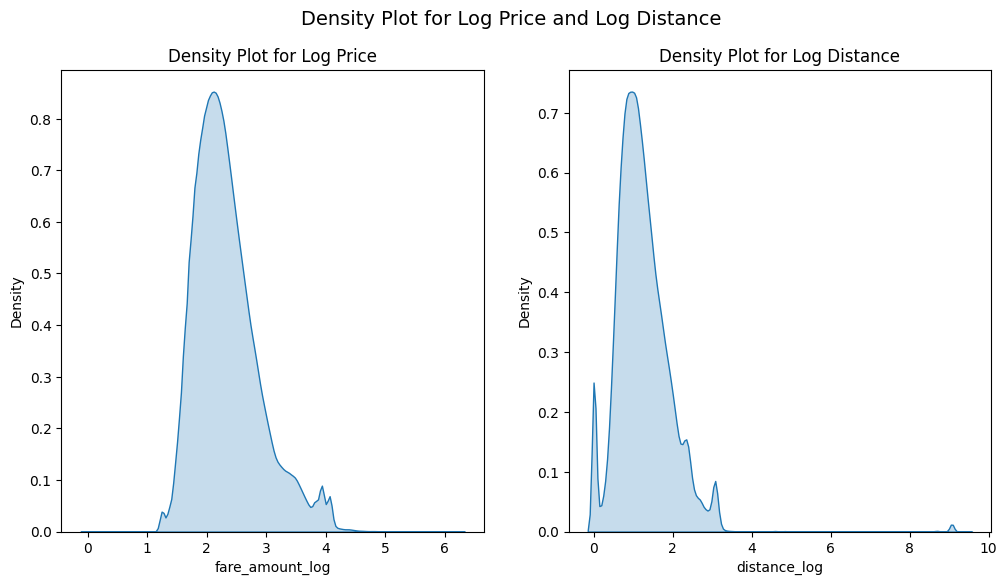

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Apply log transformation to 'fare_amount' and 'distance' columns
df['fare_amount_log'] = np.log1p(df['fare_amount'])
df['distance_log'] = np.log1p(df['distance'])

# Create a figure dimensions
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Density Plot for 'fare_amount_log'
sns.kdeplot(data=df['fare_amount_log'], ax=axes[0], fill=True)
axes[0].set_title('Density Plot for Log Price')

# Density Plot for 'distance_log'
sns.kdeplot(data=df['distance_log'], ax=axes[1], fill=True)
axes[1].set_title('Density Plot for Log Distance')

# Subplots Title
plt.suptitle('Density Plot for Log Price and Log Distance', fontsize=14)
plt.show()


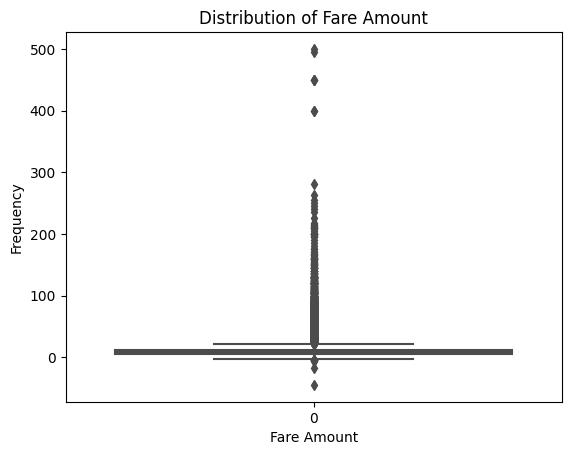

In [ ]:
#plot the fare amount using boxplot
sns.boxplot(df['fare_amount'],color='blue')
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#Skewniess to the right ? try to take log tansformation


***Passenger counts***

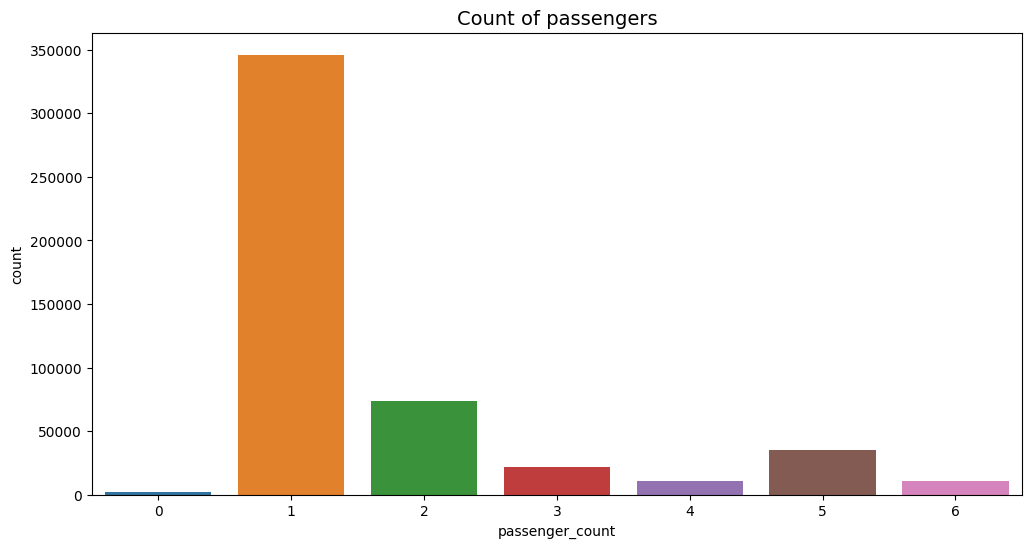

In [ ]:
# Create a figure dimension
plt.figure(figsize=(12, 6))

# CountPlot for type of meal
sns.countplot(data=df, x='passenger_count')
# Add title
plt.title('Count of passengers', fontsize=14)

# Show plot
plt.show()

***Extract the year,month,day,hours from Key column***
- Noted,key and pickup time is same

In [ ]:
df['key'] = pd.to_datetime(df['key'])
# Extracting components
df['Year'] = df['key'].dt.year
df['Month'] = df['key'].dt.month
df['Day'] = df['key'].dt.day
df['Hour'] = df['key'].dt.hour  #format 24 not 12

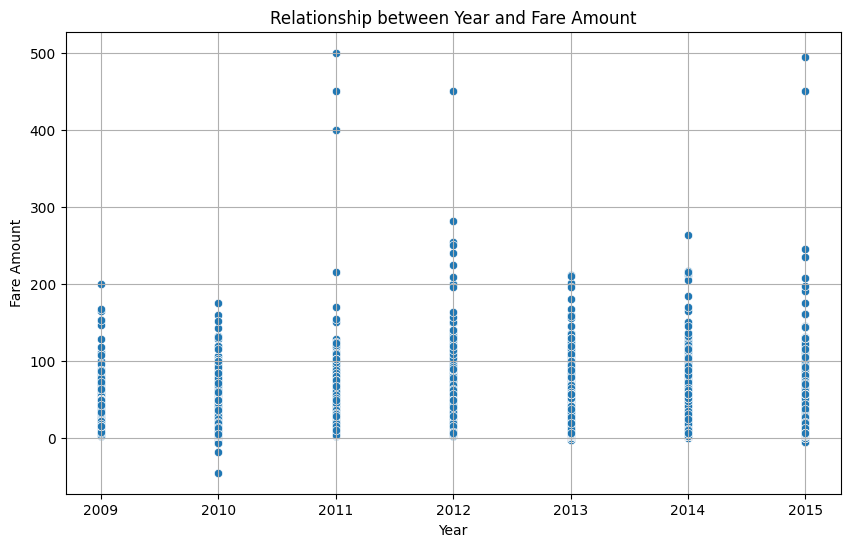

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='year', y='fare_amount')
plt.title('Relationship between Year and Fare Amount')
plt.xlabel('Year')
plt.ylabel('Fare Amount')
plt.grid(True)
plt.show()


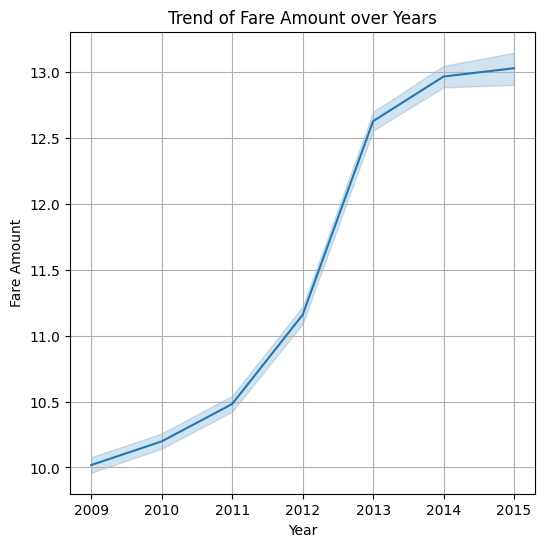

In [ ]:
plt.figure(figsize=(6, 6))
sns.lineplot(data=df, x='Year', y='fare_amount')
plt.title('Trend of Fare Amount over Years')
plt.xlabel('Year')
plt.ylabel('Fare Amount')
plt.grid(True)
plt.show()

In [ ]:
#from the figure above the fare amount inceases interms of the year (Make since)

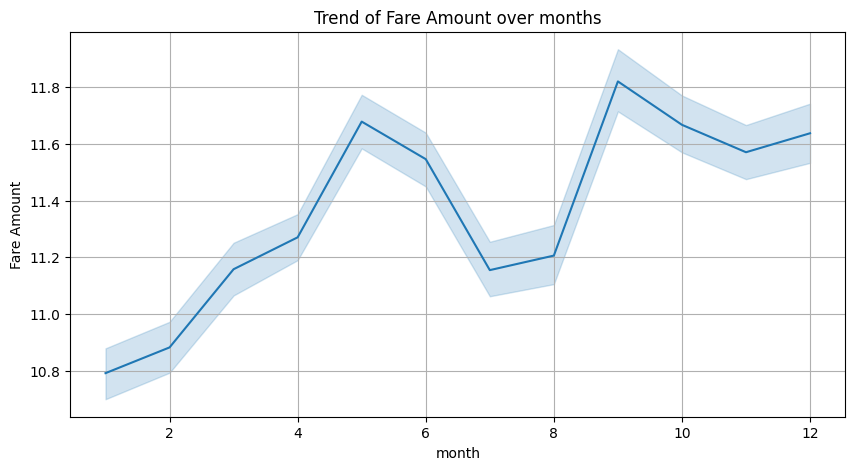

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Month', y='fare_amount')
plt.title('Trend of Fare Amount over months')
plt.xlabel('month')
plt.ylabel('Fare Amount')
plt.grid(True)
plt.show()

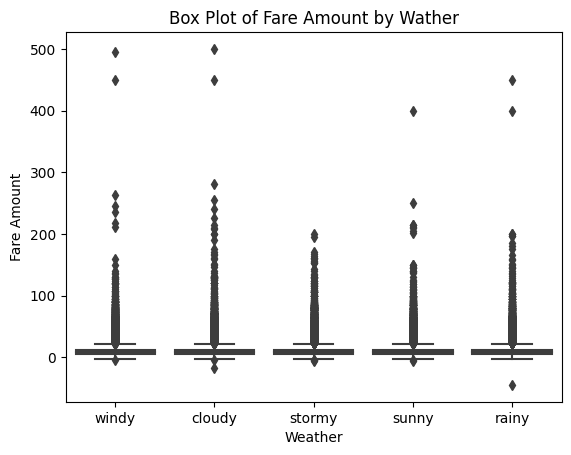

In [ ]:
sns.boxplot(x='Weather', y='fare_amount', data=df)
plt.xlabel('Weather')
plt.ylabel('Fare Amount')
plt.title('Box Plot of Fare Amount by Wather')
plt.show()

***Plot the relationship between number of passengers and fare amount***

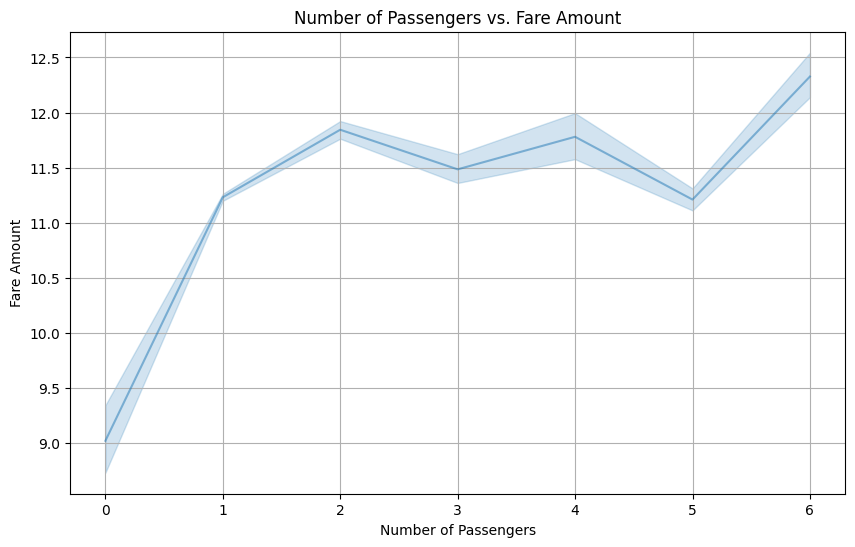

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='passenger_count', y='fare_amount', data=df, alpha=0.5)
plt.title('Number of Passengers vs. Fare Amount')
plt.xlabel('Number of Passengers')
plt.ylabel('Fare Amount')
plt.grid(True)
plt.show()

***Plot the relationship between number of weekday and fare amount***

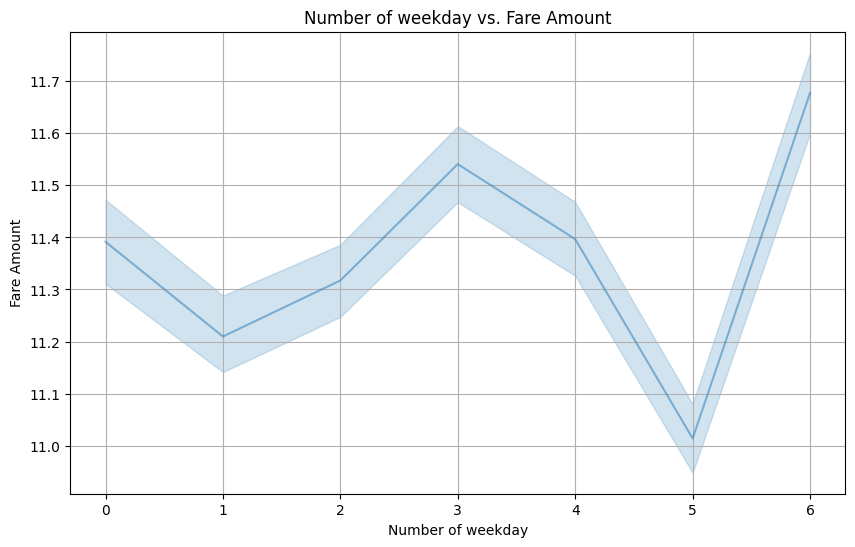

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='weekday', y='fare_amount', data=df, alpha=0.5)
plt.title('Number of weekday vs. Fare Amount')
plt.xlabel('Number of weekday')
plt.ylabel('Fare Amount')
plt.grid(True)
plt.show()

***Plot the correlation matrix***

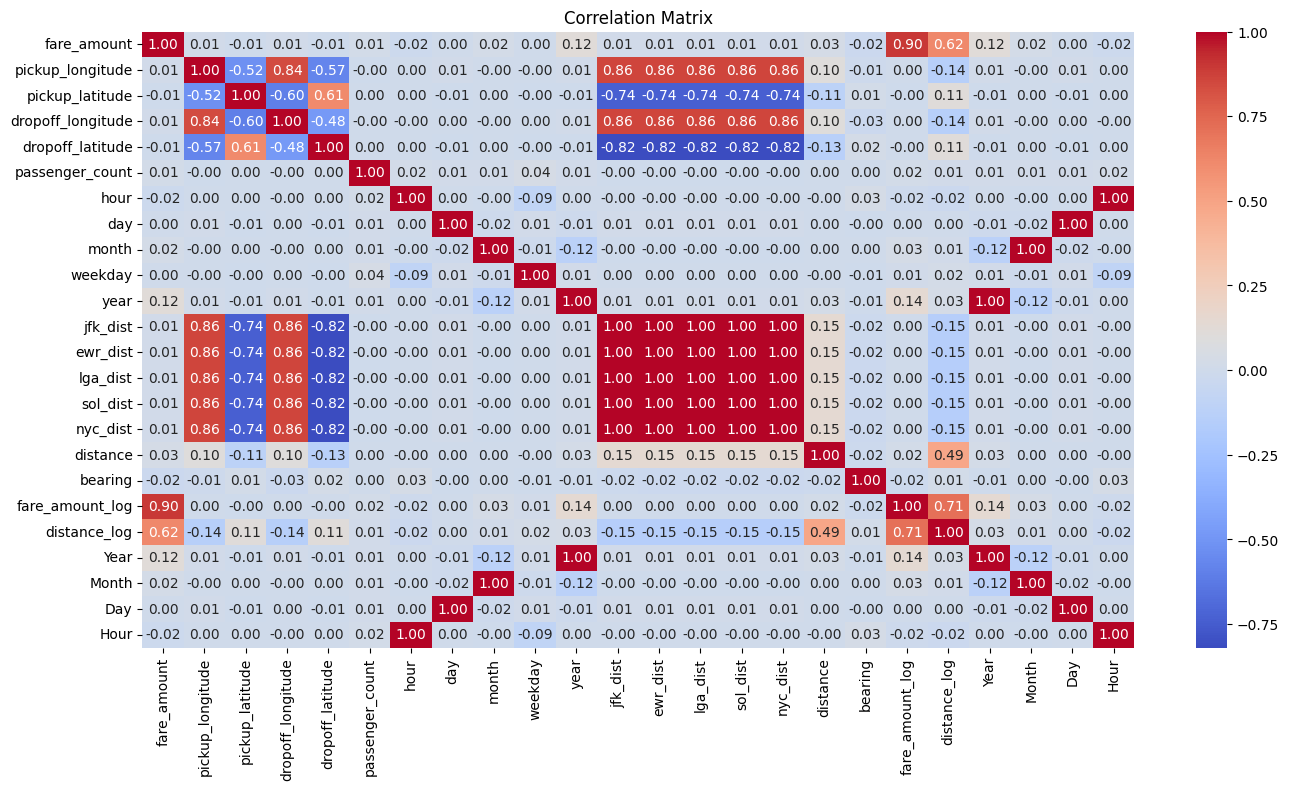

In [ ]:
# Correlation matrix
correlation_matrix = df.corr(numeric_only = True)

# Create a heatmap using seaborn
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#we can see a lot of correlation between distance and longitude this is because the distance itself uses the longitude and latitude to be calculated.

***Plotting the average fare amount by car condition***

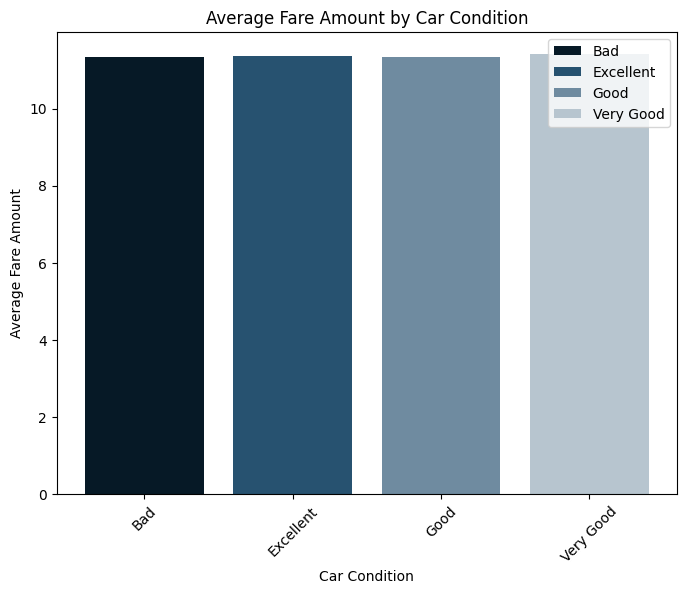

In [ ]:
average_fare_by_condition = df.groupby('Car Condition')['fare_amount'].mean()

colors = ['#061926', '#275270', '#6f8ba0', '#b7c5cf']

# Plotting the average fare amount by car condition
plt.figure(figsize=(8, 6))
bars = plt.bar(average_fare_by_condition.index, average_fare_by_condition.values, color=colors)
plt.xlabel('Car Condition')
plt.ylabel('Average Fare Amount')
plt.title('Average Fare Amount by Car Condition')
plt.xticks(rotation=45)

# Add legend for colors
plt.legend(bars, average_fare_by_condition.index)

plt.show()


***What are the rush hours in NYC? "The city that never sleeps"***

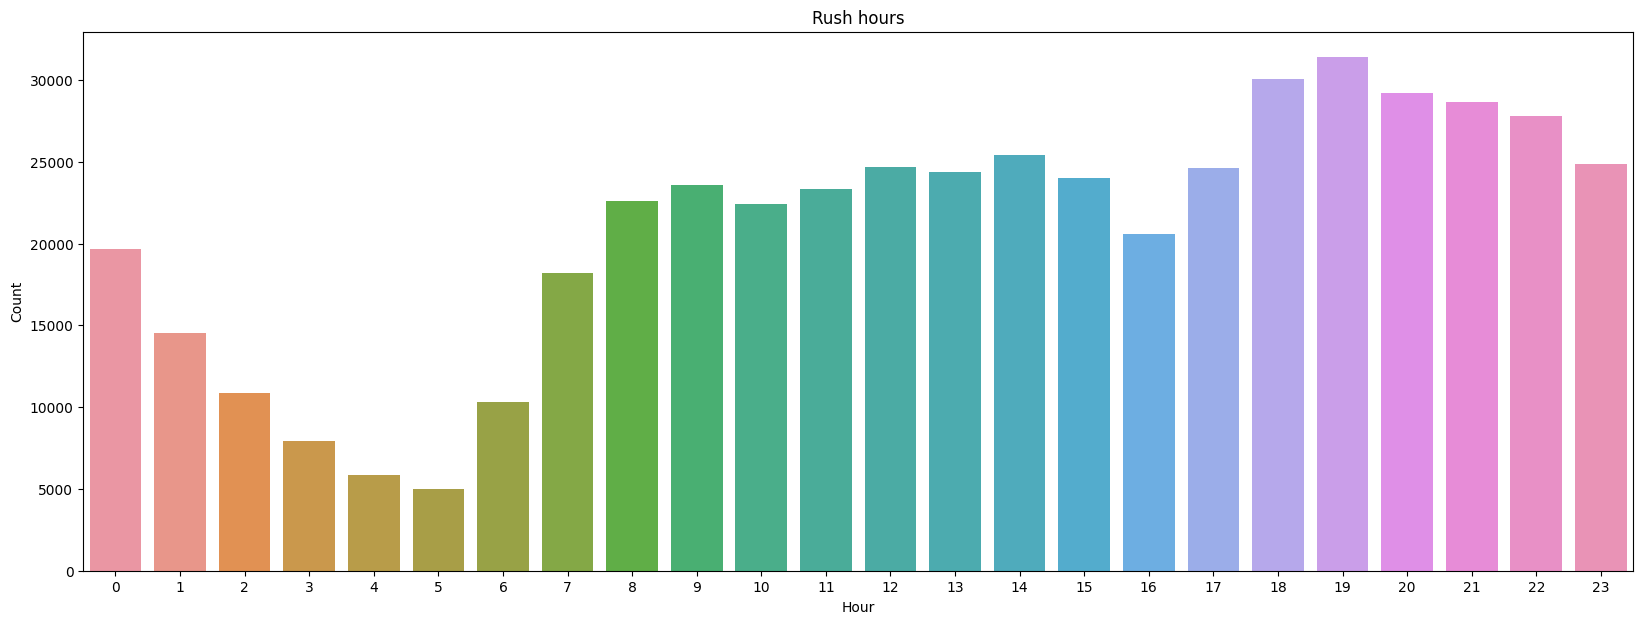

In [ ]:
plt.figure(figsize=(20, 7))
sns.countplot(data=df, x="hour")
plt.title("Rush hours")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.show()

#### Rush hour typically starts around 7:00 AM as people commute to work or school, and it peaks around 18:00 (6:00 PM) as people return home. During these peak hours, traffic congestion tends to be at its worst due to the increased volume of vehicles on the road

***Do rush hour and passenger count affect the fare, which could mean to potential split fare fee?***

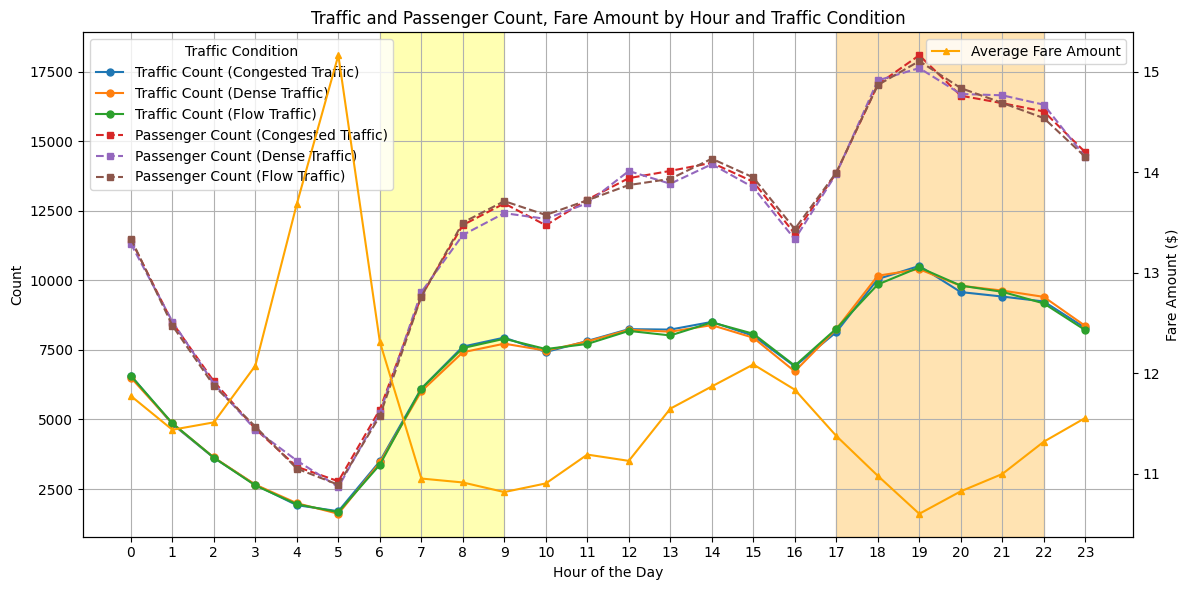

In [ ]:
passenger_count_by_hour_traffic = df.groupby(['hour', 'Traffic Condition'])['passenger_count'].sum().unstack(fill_value=0)
traffic_count_by_hour_traffic = df.groupby(['hour', 'Traffic Condition']).size().unstack(fill_value=0)
fare_amount_by_hour = df.groupby('hour')['fare_amount'].mean()

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot counts for each traffic condition
for condition in traffic_count_by_hour_traffic.columns:
    ax1.plot(traffic_count_by_hour_traffic.index, traffic_count_by_hour_traffic[condition], marker='o', markersize=5, label=f'Traffic Count ({condition})')

for condition in passenger_count_by_hour_traffic.columns:
    ax1.plot(passenger_count_by_hour_traffic.index, passenger_count_by_hour_traffic[condition], marker='s', markersize=5, linestyle='--', label=f'Passenger Count ({condition})')

# Plot average fare amount over hours
ax2 = ax1.twinx()
ax2.plot(fare_amount_by_hour.index, fare_amount_by_hour, marker='^', markersize=5, linestyle='-', label='Average Fare Amount', color='orange')

ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Count')
ax2.set_ylabel('Fare Amount ($)')
ax1.set_title('Traffic and Passenger Count, Fare Amount by Hour and Traffic Condition')
ax1.legend(title='Traffic Condition', loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(True)

# Highlight rush hours
ax1.axvspan(6, 9, color='yellow', alpha=0.3, label='Morning Rush Hour (6AM-9AM)')
ax1.axvspan(17, 22, color='orange', alpha=0.3, label='Evening Rush Hour (5PM-10PM)')
plt.xticks(range(24))
plt.tight_layout()
plt.show()


##### New York's taxis face a double threat: more traffic from buses and cars AND New Yorkers preferring the faster and cheaper subway.
##### A recent New York Times article even highlights the subway's dominance, this could force taxi fares down due to lower demand even during rush hours.

##### The impact depends on where these new drivers and subway riders are compared to taxi hotspots. Flexible pricing and innovative services like carpooling might help taxis compete with cheaper options and ride-hailing apps like Uber and Lyft.

##### The future is uncertain, but one thing's clear: taxis need to adapt or risk fading away in the face of changing transportation preferences and traffic congestion.

***How do bearing angles vary throughout rush hours? & what does that mean?***

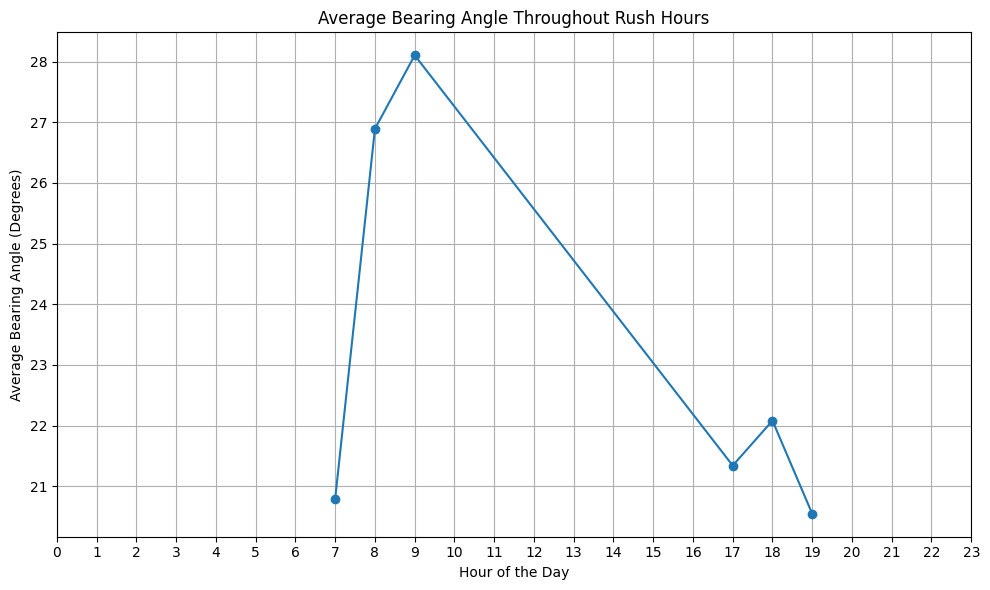

In [ ]:
import numpy as np
rush_hour_data2 = df[(df['hour'].isin(range(7, 10)) | df['hour'].isin(range(17, 20)))]
rush_hour_data2['bearing_degrees'] = np.degrees(rush_hour_data2['bearing'])
average_bearing_by_hour = rush_hour_data2.groupby('hour')['bearing_degrees'].mean()

plt.figure(figsize=(10, 6))
plt.plot(average_bearing_by_hour.index, average_bearing_by_hour.values, marker='o', linestyle='-')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Bearing Angle (Degrees)')
plt.title('Average Bearing Angle Throughout Rush Hours')
plt.grid(True)
plt.xticks(range(24))
plt.tight_layout()
plt.show()


In [ ]:
#A bearing angle of 0 degrees corresponds to true north.
#A bearing angle of 90 degrees corresponds to east.
#A bearing angle of 180 degrees corresponds to south.
#A bearing angle of 270 degrees corresponds to west.
#A bearing angle of 360 degrees is equivalent to 0 degrees and also corresponds to true north.

***Fare amount with repect to jfk_dist,ewr_dist, lga_dist,nyc_dist***

- Jfk: distance from john Kennedy airport
- Ewr: distance from Newark Liberty International Airport
- Lga: New York Municipal Airport-LaGuardia Field
- Nyc: new York city


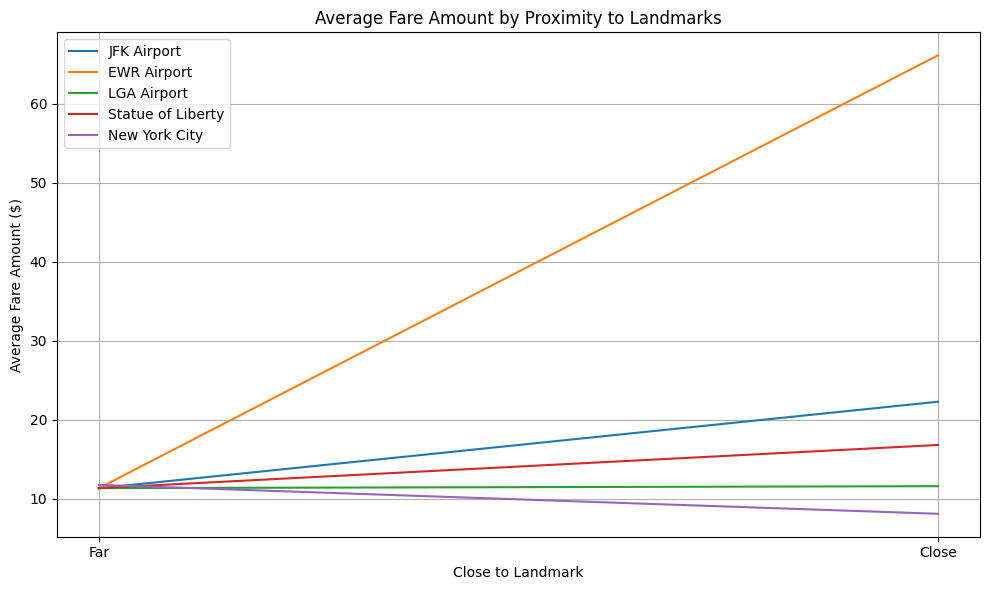

In [ ]:
# 5 miles will be considered close
threshold = 5

# Set values True or False depending on whether the numbers are close or not.
df['close_to_jfk'] = df['jfk_dist'] < threshold
df['close_to_ewr'] = df['ewr_dist'] < threshold
df['close_to_lga'] = df['lga_dist'] < threshold
df['close_to_sol'] = df['sol_dist'] < threshold
df['close_to_nyc'] = df['nyc_dist'] < threshold

# Average fare rate for each landmark based on whether close or not.
average_fare_jfk = df.groupby('close_to_jfk')['fare_amount'].mean()
average_fare_ewr = df.groupby('close_to_ewr')['fare_amount'].mean()
average_fare_lga = df.groupby('close_to_lga')['fare_amount'].mean()
average_fare_sol = df.groupby('close_to_sol')['fare_amount'].mean()
average_fare_nyc = df.groupby('close_to_nyc')['fare_amount'].mean()

plt.figure(figsize=(10, 6))

plt.plot(average_fare_jfk.index, average_fare_jfk.values, label='JFK Airport')
plt.plot(average_fare_ewr.index, average_fare_ewr.values, label='EWR Airport')
plt.plot(average_fare_lga.index, average_fare_lga.values, label='LGA Airport')
plt.plot(average_fare_sol.index, average_fare_sol.values, label='Statue of Liberty')
plt.plot(average_fare_nyc.index, average_fare_nyc.values, label='New York City')

plt.xlabel('Close to Landmark')
plt.ylabel('Average Fare Amount ($)')
plt.title('Average Fare Amount by Proximity to Landmarks')
plt.legend()
plt.grid(True)

# "far" (False) or "close" (True)
plt.xticks([0, 1], ['Far', 'Close'])
plt.tight_layout()
plt.show()


***Preprocessing***
-  Drop unnecessarily columns such as Username,driverName,UserID
-  remove the outliers
-  drop the values of fare_amount that is less than  or equal zero as we shown abovest',

In [ ]:
print(len(df[df['fare_amount'] < 0])) # number of records that contain negative values
print(len(df[df['fare_amount'] ==0])) # number of records that contain negative values)

21
14


In [ ]:
df.head()

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,...,distance_log,Year,Month,Day,Hour,close_to_jfk,close_to_ewr,close_to_lga,close_to_sol,close_to_nyc
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21,-1.288826,...,0.708412,2009,6,15,17,False,False,False,False,False
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16,-1.291824,...,2.246029,2010,1,5,16,False,False,False,False,False
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00,-1.291242,...,0.871095,2011,8,18,0,False,False,False,False,False
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42,-1.291319,...,1.334809,2012,4,21,4,False,False,False,False,False
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,...,1.098331,2010,3,9,7,False,False,False,False,False


In [ ]:
df1 = df[~(df['fare_amount'] <= 0)]
# Print the length of the filtered DataFrame
print(len(df1))

499965


In [ ]:
#drop null values
df1.dropna(inplace=True)

In [ ]:
len(df1)

499960

# New Task Work

In [ ]:
# Select only numeric columns
numeric_columns = df1.select_dtypes(include=['number'])

# Calculate quartiles and IQR for numeric columns
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1

# Set a threshold for considering a point as an outlier
k = 1.5
outliers = ((numeric_columns < (Q1 - k * IQR)) | (numeric_columns > (Q3 + k * IQR))).any(axis=1)

# Display rows without outliers
df_outliers = df1[~outliers]

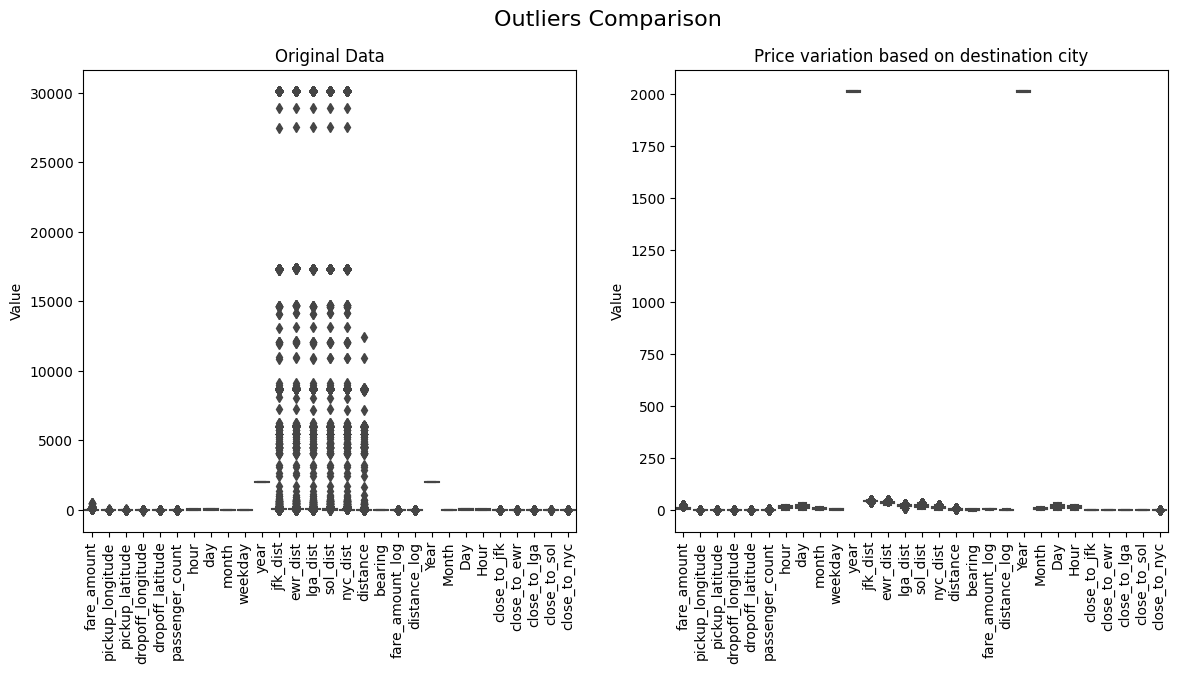

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for the original DataFrame (df)
sns.boxplot(data=df1, ax=axes[0])
axes[0].set(title='Original Data', ylabel='Value')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)  # Rotate x-axis labels

# Boxplot for the DataFrame without outliers (df_outliers)
sns.boxplot(data=df_outliers, ax=axes[1])
axes[1].set(title='Price variation based on destination city', ylabel='Value')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)  # Rotate x-axis labels

plt.suptitle('Outliers Comparison', fontsize=16)

plt.show()

I will drop the unneeded categorical columns then I will transform it to numerical using encoding techniques

In [ ]:
print(df1.shape, df_outliers.shape)

(499960, 37) (364892, 37)


In [ ]:
df1 = df_outliers.copy()

In [ ]:
df1.columns

Index(['User ID', 'User Name', 'Driver Name', 'Car Condition', 'Weather',
       'Traffic Condition', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance', 'bearing', 'fare_amount_log', 'distance_log',
       'Year', 'Month', 'Day', 'Hour', 'close_to_jfk', 'close_to_ewr',
       'close_to_lga', 'close_to_sol', 'close_to_nyc'],
      dtype='object')

In [ ]:
df1.drop(columns=['User ID', 'User Name', 'Driver Name', 'pickup_datetime', 'key', 'close_to_jfk', 'close_to_ewr', 'close_to_lga', 'close_to_sol', 'close_to_nyc', 'Year', 'Month', 'Day', 'Hour'], axis=1, inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364892 entries, 2 to 499999
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Car Condition      364892 non-null  object 
 1   Weather            364892 non-null  object 
 2   Traffic Condition  364892 non-null  object 
 3   fare_amount        364892 non-null  float64
 4   pickup_longitude   364892 non-null  float64
 5   pickup_latitude    364892 non-null  float64
 6   dropoff_longitude  364892 non-null  float64
 7   dropoff_latitude   364892 non-null  float64
 8   passenger_count    364892 non-null  int64  
 9   hour               364892 non-null  int64  
 10  day                364892 non-null  int64  
 11  month              364892 non-null  int64  
 12  weekday            364892 non-null  int64  
 13  year               364892 non-null  int64  
 14  jfk_dist           364892 non-null  float64
 15  ewr_dist           364892 non-null  float64
 16  lga_dis

In [ ]:
# Define which columns are categorical and which are ordinal
ordinal_columns = ['Car Condition']
non_ordinal_columns = ['Weather', 'Traffic Condition']

# Manual encoding for Car Condition
car_condition_mapping = {'Bad': 0, 'Good': 1, 'Very Good': 2, 'Excellent': 3}
df1['Car Condition'] = df1['Car Condition'].map(car_condition_mapping)

# Encode non-ordinal columns using One-Hot Encoding (get_dummies)
encoded_df = pd.get_dummies(df1, columns=non_ordinal_columns)

# Display the first few rows of the encoded DataFrame
encoded_df.head()


,Car Condition,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,...,fare_amount_log,distance_log,Weather_cloudy,Weather_rainy,Weather_stormy,Weather_sunny,Weather_windy,Traffic Condition_Congested Traffic,Traffic Condition_Dense Traffic,Traffic Condition_Flow Traffic
2,0,5.7,-1.291242,0.711418,-1.291391,0.711231,2,0,18,8,...,1.902108,0.871095,False,False,True,False,False,True,False,False
3,2,7.7,-1.291319,0.710927,-1.291396,0.711363,1,4,21,4,...,2.163323,1.334809,False,False,True,False,False,False,False,True
4,0,5.3,-1.290987,0.711536,-1.290787,0.711811,1,7,9,3,...,1.840550,1.098331,False,False,True,False,False,True,False,False
5,3,12.1,-1.291560,0.710901,-1.291071,0.711365,1,9,6,1,...,2.572612,1.565954,False,False,False,True,False,True,False,False
6,3,7.5,-1.291195,0.711251,-1.291086,0.711481,1,20,20,11,...,2.140066,0.938368,False,False,False,False,True,False,False,True


In [ ]:
# Select boolean columns
boolean_columns = encoded_df.select_dtypes(include=["bool"]).columns

# Convert boolean columns to integer type (True -> 1, False -> 0)
encoded_df[boolean_columns] = encoded_df[boolean_columns].astype(int)

# Display the first few rows of the encoded DataFrame
encoded_df.head()


,Car Condition,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,...,fare_amount_log,distance_log,Weather_cloudy,Weather_rainy,Weather_stormy,Weather_sunny,Weather_windy,Traffic Condition_Congested Traffic,Traffic Condition_Dense Traffic,Traffic Condition_Flow Traffic
2,0,5.7,-1.291242,0.711418,-1.291391,0.711231,2,0,18,8,...,1.902108,0.871095,0,0,1,0,0,1,0,0
3,2,7.7,-1.291319,0.710927,-1.291396,0.711363,1,4,21,4,...,2.163323,1.334809,0,0,1,0,0,0,0,1
4,0,5.3,-1.290987,0.711536,-1.290787,0.711811,1,7,9,3,...,1.840550,1.098331,0,0,1,0,0,1,0,0
5,3,12.1,-1.291560,0.710901,-1.291071,0.711365,1,9,6,1,...,2.572612,1.565954,0,0,0,1,0,1,0,0
6,3,7.5,-1.291195,0.711251,-1.291086,0.711481,1,20,20,11,...,2.140066,0.938368,0,0,0,0,1,0,0,1


In [ ]:
# Convert fare_amount floating column to integer
encoded_df['fare_amount'] = encoded_df['fare_amount'].round().astype(int)

encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364892 entries, 2 to 499999
Data columns (total 29 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Car Condition                        364892 non-null  int64  
 1   fare_amount                          364892 non-null  int64  
 2   pickup_longitude                     364892 non-null  float64
 3   pickup_latitude                      364892 non-null  float64
 4   dropoff_longitude                    364892 non-null  float64
 5   dropoff_latitude                     364892 non-null  float64
 6   passenger_count                      364892 non-null  int64  
 7   hour                                 364892 non-null  int64  
 8   day                                  364892 non-null  int64  
 9   month                                364892 non-null  int64  
 10  weekday                              364892 non-null  int64  
 11  year              

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Identify features and target
X = encoded_df.drop(columns=['fare_amount', 'fare_amount_log', 'distance'])  # Features
y = encoded_df['fare_amount_log']  # Target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [ ]:
X.columns

Index(['Car Condition', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour',
       'day', 'month', 'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist',
       'sol_dist', 'nyc_dist', 'bearing', 'distance_log', 'Weather_cloudy',
       'Weather_rainy', 'Weather_stormy', 'Weather_sunny', 'Weather_windy',
       'Traffic Condition_Congested Traffic',
       'Traffic Condition_Dense Traffic', 'Traffic Condition_Flow Traffic'],
      dtype='object')

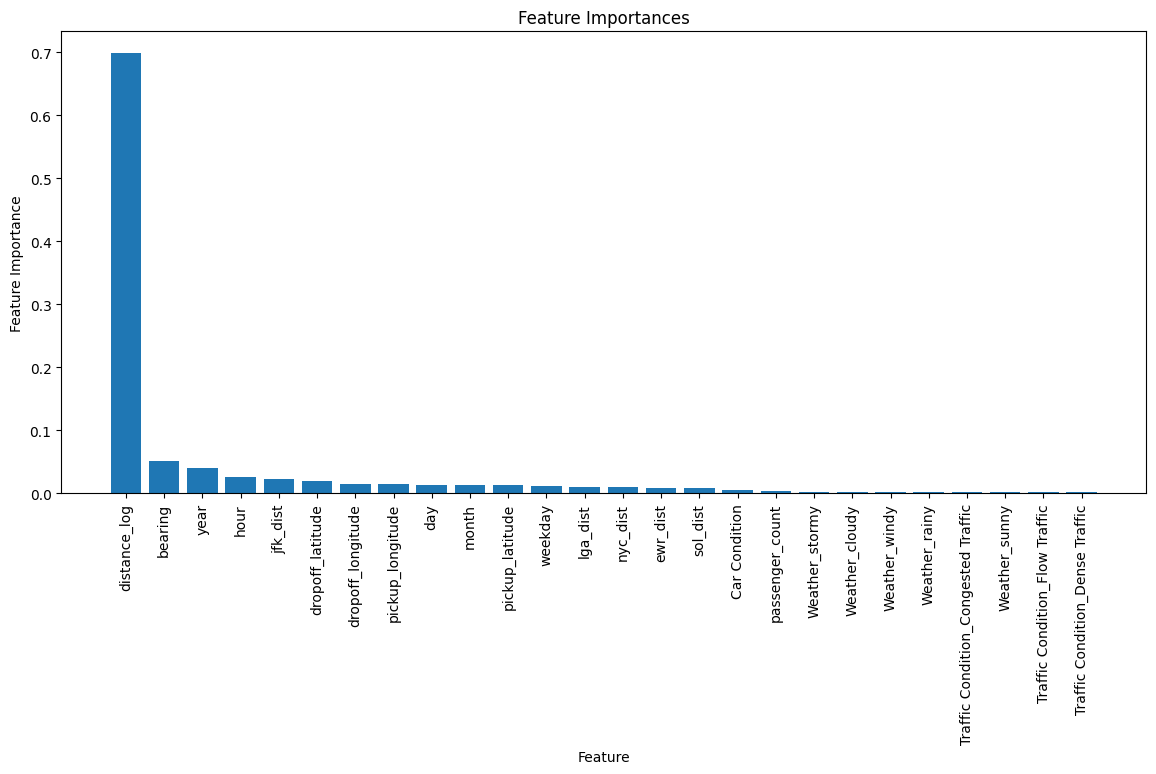

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Assuming X_train and y_train are your feature matrix and target vector respectively
# Train a Random Forest Regressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

# Get feature importances from the trained model
importances = rf_regressor.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Get feature names (column names)
feature_names = X.columns

# Plot the feature importances
plt.figure(figsize=(14, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)  # Rotate x-axis labels
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.show()


In [ ]:
# from sklearn.feature_selection import RFECV
# from sklearn.ensemble import RandomForestRegressor
# import pandas as pd

# # Initialize a Random Forest regressor
# rf_regressor = RandomForestRegressor()

# # Initialize RFECV with the regressor and scoring metric
# rfecv = RFECV(estimator=rf_regressor, scoring='neg_mean_squared_error')

# # Fit RFECV to the training data
# rfecv.fit(X_train, y_train)

# # Get the selected features
# selected_features = X_train.columns[rfecv.support_]

# # Print the selected features
# print("Selected Features:")
# print(selected_features)


In [ ]:
# # Get feature importance scores from RFE
# feature_importance = rfe.estimator_.feature_importances_

# # Sort feature importance scores in descending order
# sorted_indices = feature_importance.argsort()[::-1]
# sorted_importance = feature_importance[sorted_indices]
# sorted_features = selected_features[sorted_indices]

# # Plot feature importance scores
# plt.figure(figsize=(10, 6))
# plt.barh(range(len(sorted_importance)), sorted_importance, align='center')
# plt.yticks(range(len(sorted_importance)), sorted_features)
# plt.xlabel('Feature Importance')
# plt.ylabel('Feature')
# plt.title('Feature Importance Scores')
# plt.show()

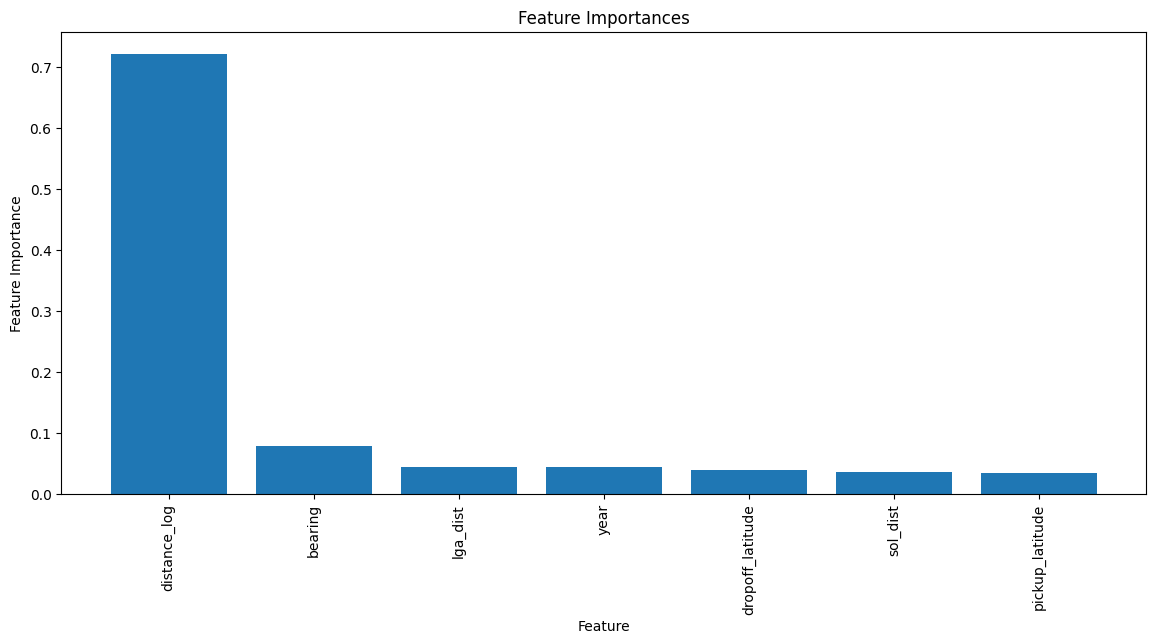

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor

# Perform KBest feature selection
kbest = SelectKBest(score_func=f_regression, k=7)  # Select top 7 features, you can adjust 'k' as per your requirement
X_train_kbest = kbest.fit_transform(X_train, y_train)

# Train a Random Forest Regressor on the selected features
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train_kbest, y_train)

# Get feature importances from the trained model
importances = rf_regressor.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Get feature names (column names)
feature_names = X.columns[kbest.get_support()]

# Plot the feature importances
plt.figure(figsize=(14, 6))
plt.title("Feature Importances")
plt.bar(range(X_train_kbest.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train_kbest.shape[1]), feature_names[indices], rotation=90)  # Rotate x-axis labels
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Identify features and target
X = encoded_df.drop(columns=['fare_amount', 'fare_amount_log', 'distance'])  # Features
y = encoded_df['fare_amount_log']  # Target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Step 1: Prepare your data
# Assuming X contains your features and y contains your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 2: Preprocess your features (if necessary)

# Step 3: Train the models
# Ridge Regression
ridge_model = Ridge(alpha=1.0)  # You can adjust the regularization strength (alpha) as needed
ridge_model.fit(X_train, y_train)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Polynomial Regression with maximum degree 3
poly_features = PolynomialFeatures(degree=3)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)


# Step 4: Make predictions
# Ridge Regression
ridge_predictions = ridge_model.predict(X_test)

# Linear Regression
linear_predictions = linear_model.predict(X_test)

# Polynomial Regression
poly_predictions = poly_model.predict(X_test_poly)

# Step 5: Evaluate the models
# Calculate MSE and RMSE for each model
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_rmse = np.sqrt(ridge_mse)

linear_mse = mean_squared_error(y_test, linear_predictions)
linear_rmse = np.sqrt(linear_mse)

poly_mse = mean_squared_error(y_test, poly_predictions)
poly_rmse = np.sqrt(poly_mse)

# Calculate R-squared for each model
r2_ridge = r2_score(y_test, ridge_predictions)
r2_linear = r2_score(y_test, linear_predictions)
r2_poly = r2_score(y_test, poly_predictions)


# Print the MSE, RMSE, and R-squared for each model
print("Ridge Regression - MSE: {:.2f}, RMSE: {:.2f}, R-squared: {:.2f}".format(ridge_mse, ridge_rmse, r2_ridge))
print("Linear Regression - MSE: {:.2f}, RMSE: {:.2f}, R-squared: {:.2f}".format(linear_mse, linear_rmse, r2_linear))
print("Polynomial Regression (Degree 3) - MSE: {:.2f}, RMSE: {:.2f}, R-squared: {:.2f}".format(poly_mse, poly_rmse, r2_poly))


KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a range of intercept values to search
fit_intercept_options = [True, False]

# Create a dictionary of hyperparameters to search
param_grid = {'fit_intercept': fit_intercept_options}

# Perform Grid Search to find the best hyperparameters
linear_grid = GridSearchCV(LinearRegression(), param_grid=param_grid, cv=5)
linear_grid.fit(X_train, y_train)

# Get the best hyperparameters
best_fit_intercept = linear_grid.best_params_['fit_intercept']

# Refit the model with the best hyperparameters
linear_model_tuned = LinearRegression(fit_intercept=best_fit_intercept)
linear_model_tuned.fit(X_train, y_train)

# Make predictions
linear_predictions_tuned = linear_model_tuned.predict(X_test)

# Evaluate the tuned Linear Regression model
linear_mse_tuned = mean_squared_error(y_test, linear_predictions_tuned)
linear_rmse_tuned = np.sqrt(linear_mse_tuned)
r2_linear_tuned = r2_score(y_test, linear_predictions_tuned)

# Print the results
print("Tuned Linear Regression - MSE: {:.2f}, RMSE: {:.2f}, R-squared: {:.2f}".format(linear_mse_tuned, linear_rmse_tuned, r2_linear_tuned))

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a range of alpha values to search
alpha_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

# Perform Grid Search to find the best alpha
ridge_grid = GridSearchCV(Ridge(), param_grid={'alpha': alpha_range}, cv=5)
ridge_grid.fit(X_train, y_train)

# Get the best alpha and refit the model
best_alpha = ridge_grid.best_params_['alpha']
ridge_model_tuned = Ridge(alpha=best_alpha)
ridge_model_tuned.fit(X_train, y_train)

# Make predictions
ridge_predictions_tuned = ridge_model_tuned.predict(X_test)

# Evaluate the tuned Ridge Regression model
ridge_mse_tuned = mean_squared_error(y_test, ridge_predictions_tuned)
ridge_rmse_tuned = np.sqrt(ridge_mse_tuned)
r2_ridge_tuned = r2_score(y_test, ridge_predictions_tuned)

# Print the results
print("Tuned Ridge Regression - MSE: {:.2f}, RMSE: {:.2f}, R-squared: {:.2f}".format(ridge_mse_tuned, ridge_rmse_tuned, r2_ridge_tuned))


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Actual values
y_actual = y_test

# Predicted values for each model
ridge_predictions = ridge_model.predict(X_test)
linear_predictions = linear_model.predict(X_test)
poly_predictions = poly_model.predict(X_test_poly)

# Calculate R-squared for each model
r2_ridge = r2_score(y_actual, ridge_predictions)
r2_linear = r2_score(y_actual, linear_predictions)
r2_poly = r2_score(y_actual, poly_predictions)

# Create scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot for Ridge Regression
plt.scatter(y_actual, ridge_predictions, color='blue', label=f'Ridge Regression (R^2={r2_ridge:.2f})')

# Scatter plot for Linear Regression
plt.scatter(y_actual, linear_predictions, color='red', label=f'Linear Regression (R^2={r2_linear:.2f})')

# Scatter plot for Polynomial Regression
plt.scatter(y_actual, poly_predictions, color='green', label=f'Polynomial Regression (R^2={r2_poly:.2f})')

# Plot diagonal line
plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], color='black', linestyle='--')

# Set plot labels and legend
plt.title('Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values for Polynomial Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, poly_predictions, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs. Predicted Values for Polynomial Regression (Degree 3)')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.show()


## Feature Selection

In [ ]:
X.columns

Index(['Car Condition', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour',
       'day', 'month', 'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist',
       'sol_dist', 'nyc_dist', 'bearing', 'distance_log', 'Weather_cloudy',
       'Weather_rainy', 'Weather_stormy', 'Weather_sunny', 'Weather_windy',
       'Traffic Condition_Congested Traffic',
       'Traffic Condition_Dense Traffic', 'Traffic Condition_Flow Traffic'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Identify features and target
feature_cols = ['distance_log','bearing', 'day', 'hour', 'year']

X_selected = encoded_df[feature_cols]  # Selected Features
y = encoded_df['fare_amount_log']  # Target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
X_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364892 entries, 2 to 499999
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   distance_log  364892 non-null  float64
 1   bearing       364892 non-null  float64
 2   day           364892 non-null  int64  
 3   hour          364892 non-null  int64  
 4   year          364892 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 16.7 MB


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Step 3: Train the models
# Ridge Regression
ridge_model = Ridge(alpha=1.0)  # You can adjust the regularization strength (alpha) as needed
ridge_model.fit(X_train, y_train)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Polynomial Regression with maximum degree 3
poly_features = PolynomialFeatures(degree=3)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Step 4: Make predictions
# Ridge Regression
ridge_predictions = ridge_model.predict(X_test)

# Linear Regression
linear_predictions = linear_model.predict(X_test)

# Polynomial Regression
poly_predictions = poly_model.predict(X_test_poly)

# Step 5: Evaluate the models
# Calculate MSE and RMSE for each model
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_rmse = np.sqrt(ridge_mse)

linear_mse = mean_squared_error(y_test, linear_predictions)
linear_rmse = np.sqrt(linear_mse)

poly_mse = mean_squared_error(y_test, poly_predictions)
poly_rmse = np.sqrt(poly_mse)

# Calculate R-squared for each model
r2_ridge = r2_score(y_test, ridge_predictions)
r2_linear = r2_score(y_test, linear_predictions)
r2_poly = r2_score(y_test, poly_predictions)


# Print the MSE, RMSE, and R-squared for each model
print("Ridge Regression - MSE: {:.2f}, RMSE: {:.2f}, R-squared: {:.4f}".format(ridge_mse, ridge_rmse, r2_ridge))
print("Linear Regression - MSE: {:.2f}, RMSE: {:.2f}, R-squared: {:.4f}".format(linear_mse, linear_rmse, r2_linear))
print("Polynomial Regression (Degree 3) - MSE: {:.2f}, RMSE: {:.2f}, R-squared: {:.4f}".format(poly_mse, poly_rmse, r2_poly))

Ridge Regression - MSE: 0.05, RMSE: 0.21, R-squared: 0.6751
Linear Regression - MSE: 0.05, RMSE: 0.21, R-squared: 0.6751
Polynomial Regression (Degree 3) - MSE: 0.04, RMSE: 0.20, R-squared: 0.7154


# RandomForestRegressor,DecisionTreeRegressor,XGBRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_regressor = RandomForestRegressor(n_estimators=100,max_depth=10,)
dt_regressor = DecisionTreeRegressor(max_depth=10,splitter="best")
xgb_regressor = XGBRegressor()

rf_regressor.fit(X_train, y_train)
dt_regressor.fit(X_train, y_train)
xgb_regressor.fit(X_train, y_train)


rf_predictions = rf_regressor.predict(X_test)
dt_predictions = dt_regressor.predict(X_test)
xgb_predictions = xgb_regressor.predict(X_test)


**Evaluation:**

In [ ]:
# Mean Squared Error
rf_mse = mean_squared_error(y_test, rf_predictions)
dt_mse = mean_squared_error(y_test, dt_predictions)
xgb_mse = mean_squared_error(y_test, xgb_predictions)

# R-squared (Coefficient of Determination)
rf_r2 = r2_score(y_test, rf_predictions)
dt_r2 = r2_score(y_test, dt_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)

print("Random Forest Regression:")
print("Mean Squared Error:", rf_mse)
print("R-squared:", rf_r2)
print("\nDecision Tree Regression:")
print("Mean Squared Error:", dt_mse)
print("R-squared:", dt_r2)
print("\nXGBoost Regression:")
print("Mean Squared Error:", xgb_mse)
print("R-squared:", xgb_r2)


Random Forest Regression:
Mean Squared Error: 0.035533494783687836
R-squared: 0.7499777452424519

Decision Tree Regression:
Mean Squared Error: 0.03718051489643949
R-squared: 0.7383889137827826

XGBoost Regression:
Mean Squared Error: 0.0342925055170674
R-squared: 0.7587096455652087


In [ ]:
# Define a range of intercept values to search
fit_intercept_options = [Tgrue, False]

# Create a dictionary of hyperparameters to search
param_grid = {'fit_intercept': fit_intercept_options}

# Perform Grid Search to find the best hyperparameters
linear_grid = GridSearchCV(LinearRegression(), param_grid=param_grid, cv=5)
linear_grid.fit(X_train, y_train)

# Get the best hyperparameters
best_fit_intercept = linear_grid.best_params_['fit_intercept']

# Refit the model with the best hyperparameters
linear_model_tuned = LinearRegression(fit_intercept=best_fit_intercept)
linear_model_tuned.fit(X_train, y_train)

# Make predictions
linear_predictions_tuned = linear_model_tuned.predict(X_test)

# Evaluate the tuned Linear Regression model
linear_mse_tuned = mean_squared_error(y_test, linear_predictions_tuned)
linear_rmse_tuned = np.sqrt(linear_mse_tuned)
r2_linear_tuned = r2_score(y_test, linear_predictions_tuned)

# Print the results
print("Tuned Linear Regression - MSE: {:.2f}, RMSE: {:.2f}, R-squared: {:.4f}".format(linear_mse_tuned, linear_rmse_tuned, r2_linear_tuned))

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a range of alpha values to search
alpha_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

# Perform Grid Search to find the best alpha
ridge_grid = GridSearchCV(Ridge(), param_grid={'alpha': alpha_range}, cv=5)
ridge_grid.fit(X_train, y_train)

# Get the best alpha and refit the model
best_alpha = ridge_grid.best_params_['alpha']
ridge_model_tuned = Ridge(alpha=best_alpha)
ridge_model_tuned.fit(X_train, y_train)

# Make predictions
ridge_predictions_tuned = ridge_model_tuned.predict(X_test)

# Evaluate the tuned Ridge Regression model
ridge_mse_tuned = mean_squared_error(y_test, ridge_predictions_tuned)
ridge_rmse_tuned = np.sqrt(ridge_mse_tuned)
r2_ridge_tuned = r2_score(y_test, ridge_predictions_tuned)

# Print the results
print("Tuned Ridge Regression - MSE: {:.2f}, RMSE: {:.2f}, R-squared: {:.4f}".format(ridge_mse_tuned, ridge_rmse_tuned, r2_ridge_tuned))


# Stop Here

In [ ]:
# Assuming df is your DataFrame
car_df=df.copy()
columns_dropped=["year","month","day","hour","jfk_dist","key","ewr_dist","lga_dist","nyc_dist","sol_dist","User ID","User Name","Driver Name",
                 "pickup_longitude","pickup_latitude","dropoff_latitude","dropoff_longitude","pickup_datetime","bearing"]
car_df=car_df.drop(columns=columns_dropped)
car_df = car_df[car_df['fare_amount'] <= 200]

In [ ]:
car_df.info()

***Select the features and the labels separetly***

In [ ]:
label_encoder = LabelEncoder()

# Iterate over each categorical feature and encode its values
for feature in caltegorical_features:
    # Fit label encoder and transform feature
    car_df[feature] = label_encoder.fit_transform(car_df[feature])


In [ ]:
features = car_df.drop(columns=['fare_amount'])
labels = car_df['fare_amount']

***Split the data to train and test***

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)


***Normalise the data***

In [ ]:
scaler = RobustScaler()
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

***Model Training***

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
# Create a Linear Regression model object
model = LinearRegression()
# Fit the model to the training data
model.fit(X_train, y_train)
# Predict using the trained model
y_pred = model.predict(X_test)
# Calculate MAE

***Evaluate the Model***

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def EvaluateModel(ypred,ytest):
        mae = mean_absolute_error(ypred, ytest)
        mse = mean_squared_error(ypred, ytest)
        rmse = np.sqrt(mse)
        r2 = r2_score(ypred, ytest)

        print("Model Evaluation:")
        print("MAE:", mae)
        print("MSE:", mse)
        print("RMSE:", rmse)
        print("R2 Score:",r2)

***Linear Regression Model Evaluation***

In [ ]:
EvaluateModel(y_test, y_pred)

***RandomForestRegressor***

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regression model object
model_Rf = RandomForestRegressor()

# Fit the model to the training data
model_Rf.fit(X_train, y_train)

# Predict using the trained model
y_pred_Rf = model_Rf.predict(X_test)

***RandomForestRegressor Model Evaluation***

In [ ]:
EvaluateModel(y_test, y_pred)

***SVR***

In [ ]:
from sklearn.svm import SVR
# Create an SVR model object
model = SVR()
# Fit the model to the training data
model.fit(X_train, y_train)
# Predict using the trained model
y_pred = model.predict(X_test)

***SVR Model Evaluation***

In [ ]:
EvaluateModel(y_test, y_pred)

In [ ]:
# Apply log transformation to the data
# import nmupy as np
# log_data = np.log(df['fare_amount'])
# # Plot the original data and the log-transformed data
# #plt.hist(data, bins=50, label='Original Data')
# plt.hist(log_data, bins=50, label='Log-Transformed Data')
# plt.legend()
# plt.show()

In [ ]:
# # Calculate the average latitude and longitude for pick-up and drop-off locations
# avg_pickup_lat = df['pickup_latitude'].mean()
# avg_pickup_lon = df['pickup_longitude'].mean()
# avg_dropoff_lat = df['dropoff_latitude'].mean()
# avg_dropoff_lon = df['dropoff_longitude'].mean()
# # Calculate the center location as the average of pick-up and drop-off locations
# center_lat = (avg_pickup_lat + avg_dropoff_lat) / 2
# center_lon = (avg_pickup_lon + avg_dropoff_lon) / 2
# # Print the center location
# print("Center Location (Latitude, Longitude):", center_lat, center_lon)

In [ ]:
# import folium

# # Create a map centered at a specific location
# map = folium.Map(location=[center_lat,center_lon], zoom_start=10)

# # Add markers for pick-up and drop-off locations
# for index, row in df.iterrows():
#     folium.Marker([row['pickup_latitude'], row['pickup_longitude']], popup='Pickup').add_to(map)
#     folium.Marker([row['dropoff_longitude'], row['dropoff_longitude']], popup='Dropoff').add_to(map)

# # Save the map to an HTML file
# map.save('pickup_dropoff_map.html')
